# Assignment #5 - Deep Learning (Extra Credits)

### <font color="red"> DUE: Dec 7 (Monday) 11:00 pm </font>  

<font color="blue"> Apnav Poptani </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

## A. Description

   The dataset used here for classification is default of credit card clients Data Set from Kaggle datasets. The dataset consists of 30000+ data samples and 24 feature values. The data here classifies default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.
<br>
LIMIT_BAL = Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit
<br>
SEX = Gender (1 = male; 2 = female)
<br>
EDUCATION = Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
<br>
MARRIAGE = Marital status (1 = married; 2 = single; 3 = others)
<br>
AGE = Age (year)
<br>
History of past payment (The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 3 = payment delay for three months ;4 = payment delay for four months; 5 = payment delay for five months;6 = payment delay for six months; 7 = payment delay for seven months;8 = payment delay for eight months; 9 = payment delay for nine months and above)
<br>
PAY_0 = the repayment status in September, 2005
<br>
PAY_2 = the repayment status in August, 2005
<br>
PAY_3 = the repayment status in July, 2005
<br>
PAY_4 = the repayment status in June, 2005
<br>
PAY_5 = the repayment status in May, 2005
<br>
PAY_6 = the repayment status in April, 2005
<br>
Amount of bill statement (NT dollar)
<br>
BILL_AMT1 = amount of bill statement in September, 2005
<br>
BILL_AMT2 = amount of bill statement in August, 2005
<br>
BILL_AMT3 = amount of bill statement in July, 2005
<br>
BILL_AMT4 = amount of bill statement in June, 2005
<br>
BILL_AMT5 = amount of bill statement in May, 2005
<br>
BILL_AMT6 = amount of bill statement in April, 2005
<br>
Amount of previous payment (NT dollar)
<br>
PAY_AMT1 = amount paid in September, 2005
<br>
PAY_AMT2 = amount paid in August, 2005
<br>
PAY_AMT3 = amount paid in July, 2005
<br>
PAY_AMT4 = amount paid in June, 2005
<br>
PAY_AMT5 = amount paid in May, 2005
<br>
PAY_AMT6 = amount paid in April, 2005
<br>
default payment next month (Yes = 1, No = 0)



### Reading the Data 

Reading the .csv file.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dataset=pd.read_excel('default of credit card clients.xls')

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
# import io
# dataset = pd.read_excel(io.BytesIO(uploaded['default of credit card clients.xls']))

## B.Plots for Understanding or Analysis

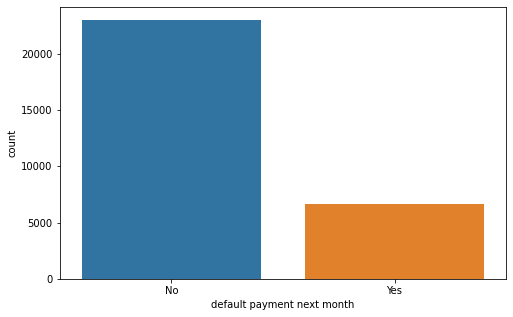

In [6]:
plt.rcParams["figure.figsize"] = (8,5)
sns.countplot(dataset['default payment next month'],label="Count").set_xticklabels(["No", "Yes"])
plt.show()

### Ratio of default payment next month
This graph shows the count of sex with respect to default payment next month. It can be clearly seen that the graph for less number of users will be paying credit card payments on time.

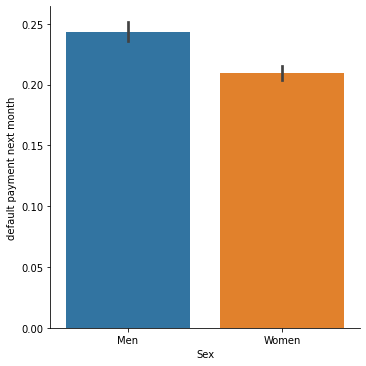

In [7]:
sns.catplot(x='SEX',y='default payment next month',data=dataset,kind='bar'
).set_axis_labels("Sex","default payment next month").set_xticklabels(["Men", "Women"])
plt.show()

### Sex vs default payment next month
This catplot shows the Gender ratio with default payment method. It can be seen that males have higher on-time payment ratio of females.
​

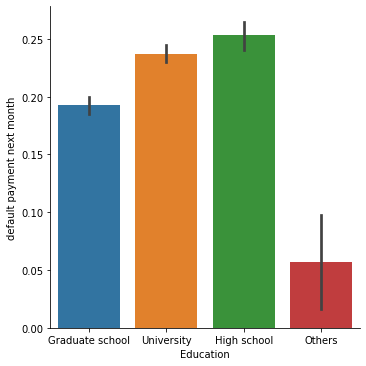

In [8]:
sns.catplot(x='EDUCATION',y='default payment next month',data=dataset,kind='bar').set_axis_labels("Education","default payment next month").set_xticklabels(["Graduate school","University", "High school" , "Others"])
plt.show()

### Education vs default payment next month
This catplot shows the effect of education on default payment next month, as it can be seen that with increase in education the default payment next month probability of the user also increases.

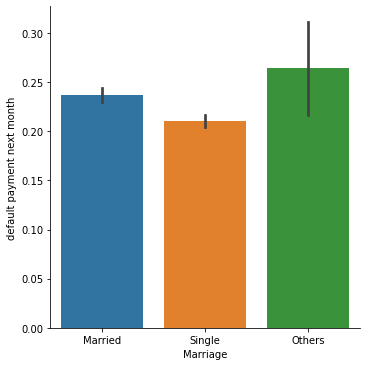

In [9]:
sns.catplot(x='MARRIAGE',y='default payment next month',data=dataset,kind='bar').set_axis_labels("Marriage","default payment next month").set_xticklabels(["Married","Single", "Others" ])
plt.show()

### Marriage vs default payment next month
This catplot shows the effect of marital status of an adult on his/her default payment next month,here it can be seen that adults who are married have greater probability of default payment next month.

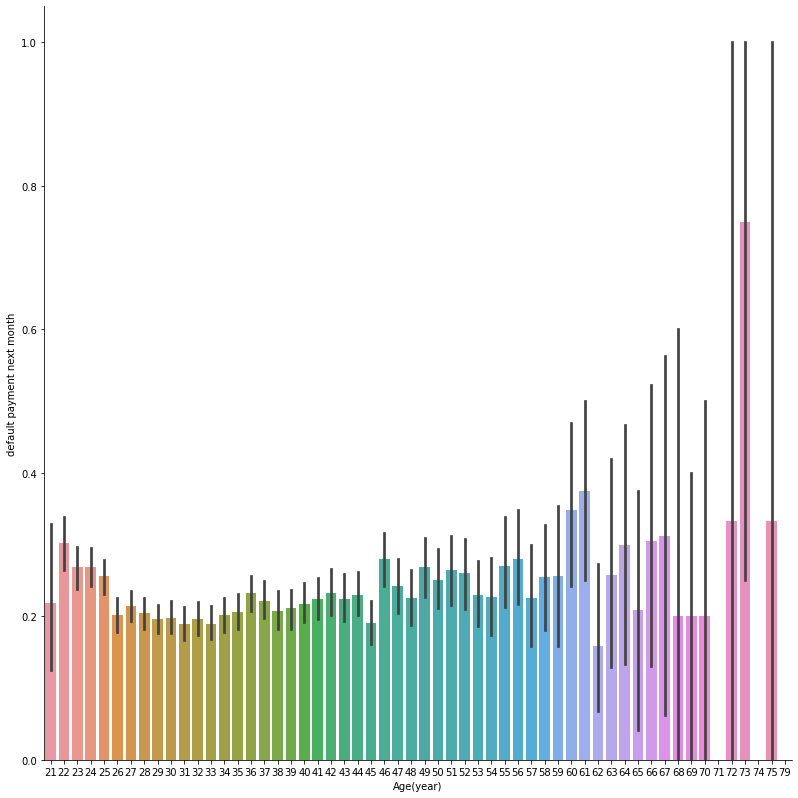

In [10]:
sns.catplot(x='AGE',y='default payment next month',data=dataset,kind='bar',height=11).set_axis_labels("Age(year)","default payment next month")
plt.show()

### Age vs default payment next month
This catplot shows the effect of age of an adult on his/her default payment next month,here it can be seen that adults who are age 60-61 have greater probability of default payment next month.

## C.Preliminary observation
The Plots above show us that:

<b>Fig1:</b> This graph shows gender ratio with respect to default payment next month. It can be clearly seen that the graph for less number of users will be paying credit card payments on time.<br>

<b>Fig2:</b> This catplot shows the Gender ratio with default payment method. It can be seen that males have higher on-time payment ratio to females.<br>

<b>Fig3:</b>This catplot shows the effect of education on default payment next month, as it can be seen that with increase in education the default payment next month probability of the user also increases.<br>

<b>Fig4:</b>This catplot shows the effect of marital status of an adult on his/her default payment next month,here it can be seen that adults who are married have greater probability of default payment next month.<br>

<b>Fig5:</b>This catplot shows the effect of age of an adult on his/her default payment next month,here it can be seen that adults who are above age of 60 have greater probability of default payment next month with slight variance.<br>

# III. Methods and Resluts

In [11]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [12]:
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,167550.544914,1.603189,1.815479,1.555454,35.464072,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374,0.223134
std,129944.020953,0.489244,0.710399,0.518092,9.213243,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739,0.416355
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split
dt=dataset['default payment next month'].values
dt1=dataset[['SEX','EDUCATION']].values
X_train, X_test, y_train, y_test = train_test_split(dt1, dt, test_size=0.3, random_state=42)

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

#First Structure

In [55]:
classifier = Sequential()
#First Layer
classifier.add(Dense(4,activation='relu', kernel_initializer='random_normal', input_dim=2))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Sixth Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

Here I created a sequential model of keras, the first layer is input layer where I have mentioned the input dimension of the dataset, I have used activation function relu for this structure and 4 number of units per layer.I have used a total of six layers in this structure.

In [56]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

classifier.compile is used here to configure the learning process , it has three parameters, I have used adam optimizer , binary_crossentropy which is the loss function and metrics to give the accuracy of the model.

In [57]:
import time
t0=time.time()

In [58]:
classifier.fit(X_train,y_train, batch_size=32, epochs=20)

Epoch 1/20
648/648 [==============================] - 1s 952us/step - loss: 0.5781 - accuracy: 0.7788
Epoch 2/20
648/648 [==============================] - 1s 894us/step - loss: 0.5285 - accuracy: 0.7788
Epoch 3/20
648/648 [==============================] - 1s 949us/step - loss: 0.5286 - accuracy: 0.7788
Epoch 4/20
648/648 [==============================] - 1s 927us/step - loss: 0.5285 - accuracy: 0.7788
Epoch 5/20
648/648 [==============================] - 1s 936us/step - loss: 0.5285 - accuracy: 0.7788
Epoch 6/20
648/648 [==============================] - 1s 847us/step - loss: 0.5286 - accuracy: 0.7788
Epoch 7/20
648/648 [==============================] - 1s 930us/step - loss: 0.5284 - accuracy: 0.7788
Epoch 8/20
648/648 [==============================] - 1s 892us/step - loss: 0.5285 - accuracy: 0.7788
Epoch 9/20
648/648 [==============================] - 1s 989us/step - loss: 0.5285 - accuracy: 0.7788
Epoch 10/20
648/648 [==============================] - 1s 988us/step - loss: 0.528

Here we are training the model with a batch size of 32 and 20 epochs.

In [59]:
t1=time.time()

In [60]:
print("Training time:" , t1-t0)

Training time: 13.2556893825531


In [61]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

648/648 [==============================] - 1s 774us/step - loss: 0.5286 - accuracy: 0.7788


[0.528563380241394, 0.7788127660751343]

In [62]:
y_pred_test=classifier.predict(X_test)
y_pred_test= (y_pred_test>0.5)
y_pred_train=classifier.predict(X_train)
y_pred_train= (y_pred_train>0.5)

## Results

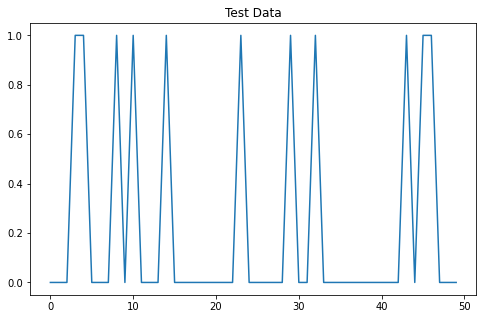

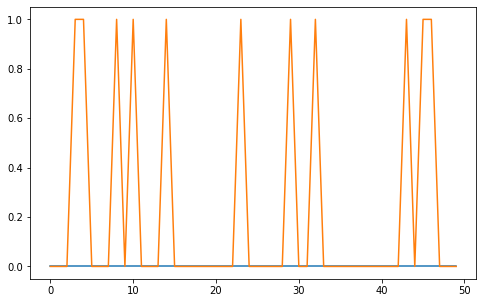

In [63]:
plt.title("Test Data")
plt.plot(y_test[0:50])
plt.show()
plt.plot(y_pred_test[0:50])
plt.plot(y_test[0:50])
plt.show()

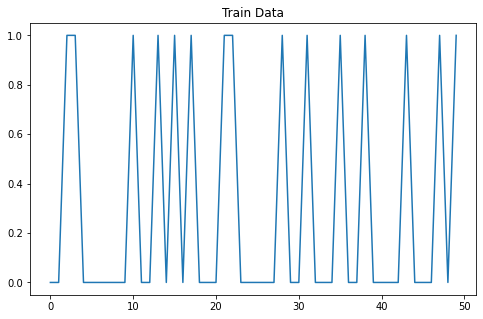

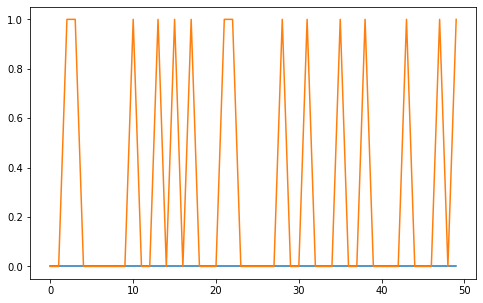

In [64]:
plt.title("Train Data")
plt.plot(y_train[0:50])
plt.show()
plt.plot(y_pred_train[0:50])
plt.plot(y_train[0:50])
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred_test)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

cf1=confusion_matrix(y_train, y_pred_train)
TP=cf1[1][1]
TN=cf1[0][0]
FN=cf1[1][0]
FP=cf1[0][1]

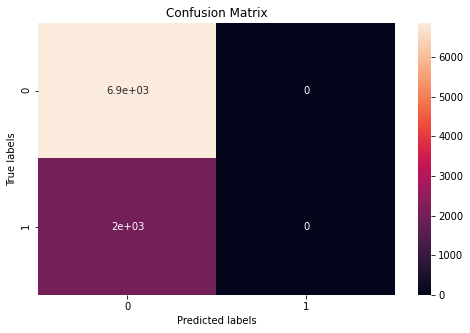

In [66]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## Discussion about Results

We got an accuracy of 77.8% in this model with seven layers and 4 hidden units each with relu activation function.

# Second Structure

In [67]:
classifier = Sequential()
#First Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal', input_dim=2))
#Second  Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Sixth Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Seventh Output Layer
classifier.add(Dense(1, activation='tanh', kernel_initializer='random_normal'))

Here I created a sequential model of keras, the first layer is input layer where I have mentioned the input dimension of the dataset, I have used activation function tanh for this structure and 12 number of units per layer.I have used a total of seven layers in this structure.

In [68]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

classifier.compile is used here to configure the learning process , it has three parameters, I have used adam optimizer , binary_crossentropy which is the loss function and metrics to give the accuracy of the model.

In [69]:
import time
t0=time.time()

In [70]:
classifier.fit(X_train,y_train, batch_size=32, epochs=20)

Epoch 1/20
648/648 [==============================] - 1s 1ms/step - loss: 3.4118 - accuracy: 0.7788
Epoch 2/20
648/648 [==============================] - 1s 1ms/step - loss: 3.4118 - accuracy: 0.7788
Epoch 3/20
648/648 [==============================] - 1s 1ms/step - loss: 3.4118 - accuracy: 0.7788
Epoch 4/20
648/648 [==============================] - 1s 1ms/step - loss: 3.4118 - accuracy: 0.7788
Epoch 5/20
648/648 [==============================] - 1s 981us/step - loss: 3.4118 - accuracy: 0.7788
Epoch 6/20
648/648 [==============================] - 1s 1ms/step - loss: 3.4118 - accuracy: 0.7788
Epoch 7/20
648/648 [==============================] - 1s 1ms/step - loss: 3.4118 - accuracy: 0.7788
Epoch 8/20
648/648 [==============================] - 1s 1ms/step - loss: 3.4118 - accuracy: 0.7788
Epoch 9/20
648/648 [==============================] - 1s 1ms/step - loss: 3.4118 - accuracy: 0.7788
Epoch 10/20
648/648 [==============================] - 1s 999us/step - loss: 3.4118 - accuracy: 0.

In [71]:
t1=time.time()

In [72]:
print("Training time:" , t1-t0)

Training time: 13.550551652908325


In [73]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

648/648 [==============================] - 0s 770us/step - loss: 3.4118 - accuracy: 0.7788


[3.411806344985962, 0.7788127660751343]

In [74]:
y_pred_test=classifier.predict(X_test)
y_pred_test= (y_pred_test>0.5)
y_pred_train=classifier.predict(X_train)
y_pred_train= (y_pred_train>0.5)

## Results

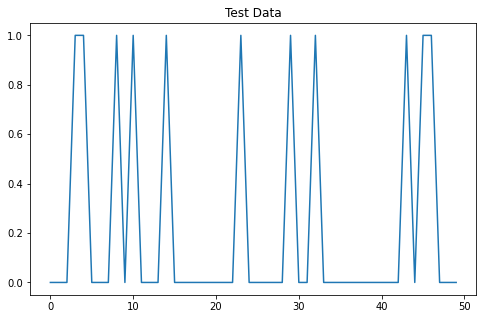

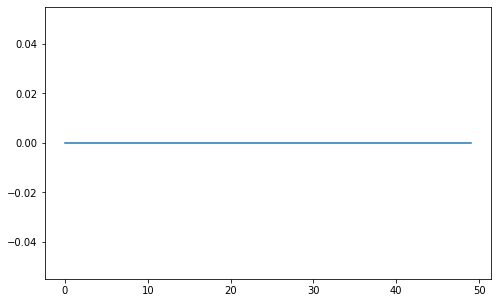

In [75]:
plt.title("Test Data")
plt.plot(y_test[0:50])
plt.show()
plt.plot(y_pred_test[0:50])
plt.show()

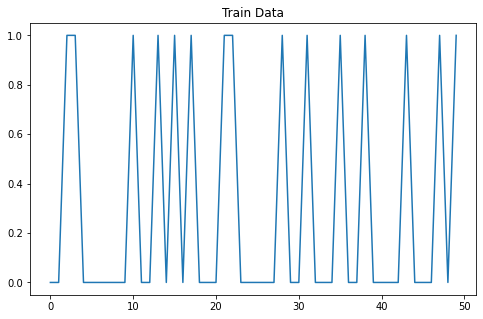

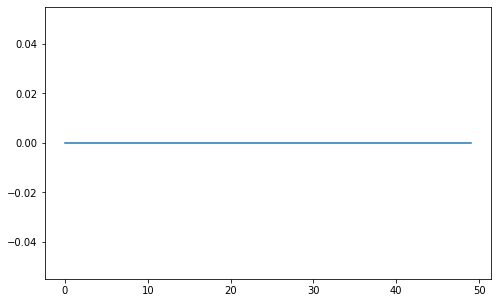

In [76]:
plt.title("Train Data")
plt.plot(y_train[0:50])
plt.show()
plt.plot(y_pred_train[0:50])
plt.show()

In [77]:
cf2=confusion_matrix(y_test, y_pred_test)
TP=cf2[1][1]
TN=cf2[0][0]
FN=cf2[1][0]
FP=cf2[0][1]

cf3=confusion_matrix(y_train, y_pred_train)
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]
precision=(TP/(TP+FP))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


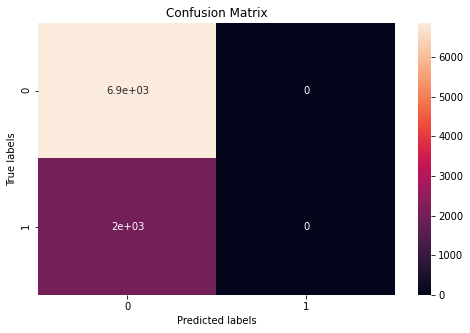

In [78]:
ax= plt.subplot()
sns.heatmap(cf2, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## Discussion about Results
We got an accuracy of 77.8% in this model with seven layers and 12 hidden units each with tanh activation function.

# Third Structure

In [79]:
classifier = Sequential()
#First Layer
classifier.add(Dense(24, activation='softmax', kernel_initializer='random_normal', input_dim=2))
#Second  Hidden Layer
classifier.add(Dense(24, activation='softmax', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(24, activation='softmax', kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(24, activation='softmax', kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(24, activation='tanh', kernel_initializer='random_normal'))
#Sixth Output Layer
classifier.add(Dense(1, activation='softmax', kernel_initializer='random_normal'))

Here I created a sequential model of keras, the first layer is input layer where I have mentioned the input dimension of the dataset, I have used activation function tanh for this structure and 12 number of units per layer.I have used a total of seven layers in this structure.

In [80]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

classifier.compile is used here to configure the learning process , it has three parameters, I have used adam optimizer , binary_crossentropy which is the loss function and metrics to give the accuracy of the model.

In [81]:
t0=time.time()

In [82]:
classifier.fit(X_train,y_train, batch_size=32, epochs=20)

Epoch 1/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8763 - accuracy: 0.2212
Epoch 2/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 3/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8763 - accuracy: 0.2212
Epoch 4/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 5/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 6/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8763 - accuracy: 0.2212
Epoch 7/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 8/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 9/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8763 - accuracy: 0.2212
Epoch 10/20
648/648 [==============================] - 1s 1ms/step - loss: 11.8763 - accura

In [83]:
t1=time.time()

In [84]:
print("Training time:" , t1-t0)

Training time: 17.300453186035156


In [85]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

648/648 [==============================] - 1s 819us/step - loss: 11.8764 - accuracy: 0.2212


[11.876351356506348, 0.2211872637271881]

In [86]:
y_pred_test=classifier.predict(X_test)
y_pred_test= (y_pred_test>0.5)
y_pred_train=classifier.predict(X_train)
y_pred_train= (y_pred_train>0.5)

## Results

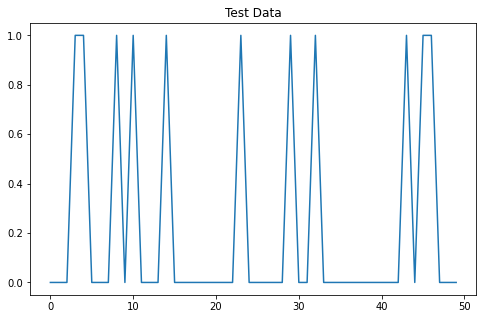

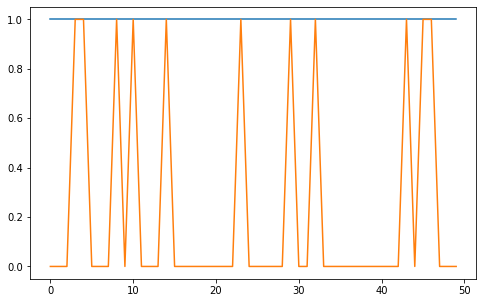

In [87]:
plt.title("Test Data")
plt.plot(y_test[0:50])
plt.show()
plt.plot(y_pred_test[0:50])
plt.plot(y_test[0:50])
plt.show()

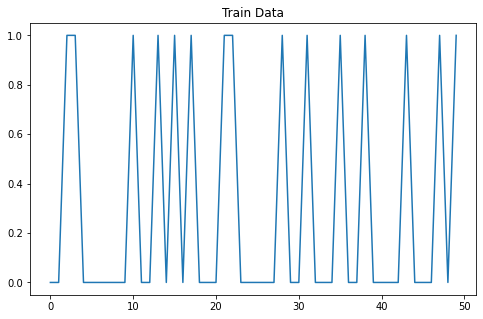

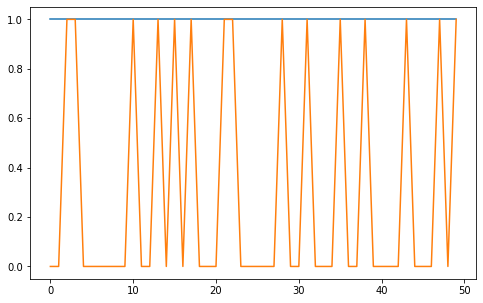

In [88]:
plt.title("Train Data")
plt.plot(y_train[0:50])
plt.show()
plt.plot(y_pred_train[0:50])
plt.plot(y_train[0:50])
plt.show()

In [89]:
cf4=confusion_matrix(y_test, y_pred_test)
TP=cf4[1][1]
TN=cf4[0][0]
FN=cf4[1][0]
FP=cf4[0][1]

cf5=confusion_matrix(y_train, y_pred_train)
TP=cf5[1][1]
TN=cf5[0][0]
FN=cf5[1][0]
FP=cf5[0][1]
precision=(TP/(TP+FP))

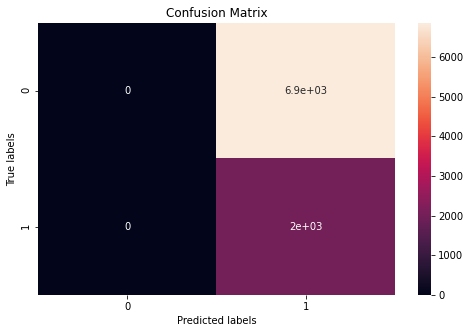

In [90]:
ax= plt.subplot()
sns.heatmap(cf4, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## Discussion about Results

We got an accuracy of 22% in this model with six layers and 24 hidden units each with softmax activation function.

# Comparison of results and choice of parameters

For the first structure I chose to make a simple model with five deep layers each with 4 hidden units and used relu activation function. I got an accuracy of 77.8% which shows that the model is overfitting the dataset we have.
<br><br>
For the second structure I made the model of seven layers with one input layer, one output layer and five hidden layers each with 12 hidden units and tanh activation function.Here I got an accuracy of 77.8% which shows activation function here did not affect the results. 
<br><br>
For the third structure I made the model of six layers with four hidden layers and each hidden layer with 24 hidden units which had an accuracy of 22%.The choice of model shows that the activation function also effects the overall results of the model a lot.


# Conclusion

I have implemented three deep neural net structures in this assignment and I have learned how the choice of parameters for the model affect the results of the model. I have also implemented the same models on GPU and found the difference between training times of both.

# Extra Credit

In [18]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
# tf.enable_eager_execution()

In [21]:
dataset=pd.read_excel('default of credit card clients.xls')

In [22]:
from sklearn.model_selection import train_test_split
dt=dataset['default payment next month'].values
dt1=dataset[['SEX','EDUCATION']].values
X_train, X_test, y_train, y_test = train_test_split(dt1, dt, test_size=0.3, random_state=42)

# First Structure

In [23]:
classifier = Sequential()
#First Layer
classifier.add(Dense(4,activation='relu', kernel_initializer='random_normal', input_dim=2))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Sixth Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [24]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [25]:
import time
t0=time.time()

In [26]:
classifier.fit(X_train,y_train, batch_size=32, epochs=20)

Epoch 1/20
648/648 [==============================] - 2s 3ms/step - loss: 0.6278 - accuracy: 0.7788
Epoch 2/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5562 - accuracy: 0.7788
Epoch 3/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5345 - accuracy: 0.7788
Epoch 4/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5295 - accuracy: 0.7788
Epoch 5/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5285 - accuracy: 0.7788
Epoch 6/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5284 - accuracy: 0.7788
Epoch 7/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5285 - accuracy: 0.7788
Epoch 8/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5284 - accuracy: 0.7788
Epoch 9/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5284 - accuracy: 0.7788
Epoch 10/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5284 - accuracy: 0.7788

In [27]:
t1=time.time()

In [28]:
print("Training time:" , t1-t0)

Training time: 37.70200800895691


# Second Structure

In [29]:
classifier = Sequential()
#First Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal', input_dim=2))
#Second  Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Sixth Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Seventh Output Layer
classifier.add(Dense(1, activation='tanh', kernel_initializer='random_normal'))

In [30]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [31]:
t0=time.time()

In [32]:
classifier.fit(X_train,y_train, batch_size=32, epochs=20)

Epoch 1/20
648/648 [==============================] - 2s 3ms/step - loss: 0.6190 - accuracy: 0.7788
Epoch 2/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5282 - accuracy: 0.7788
Epoch 3/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5283 - accuracy: 0.7788
Epoch 4/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5276 - accuracy: 0.7788
Epoch 5/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5280 - accuracy: 0.7788
Epoch 6/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5274 - accuracy: 0.7788
Epoch 7/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5273 - accuracy: 0.7788
Epoch 8/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5277 - accuracy: 0.7788
Epoch 9/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5277 - accuracy: 0.7788
Epoch 10/20
648/648 [==============================] - 2s 3ms/step - loss: 0.5278 - accuracy: 0.7788

In [33]:
t1=time.time()

In [34]:
print("Training time:" , t1-t0)

Training time: 36.79827928543091


# Third Structure

In [35]:
classifier = Sequential()
#First Layer
classifier.add(Dense(24, activation='softmax', kernel_initializer='random_normal', input_dim=2))
#Second  Hidden Layer
classifier.add(Dense(24, activation='softmax', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(24, activation='softmax', kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(24, activation='softmax', kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(24, activation='tanh', kernel_initializer='random_normal'))
#Sixth Output Layer
classifier.add(Dense(1, activation='softmax', kernel_initializer='random_normal'))

In [36]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [37]:
t0=time.time()

In [38]:
classifier.fit(X_train,y_train, batch_size=32, epochs=20)

Epoch 1/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8763 - accuracy: 0.2212
Epoch 2/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 3/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 4/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 5/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 6/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8763 - accuracy: 0.2212
Epoch 7/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8764 - accuracy: 0.2212
Epoch 8/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8763 - accuracy: 0.2212
Epoch 9/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8763 - accuracy: 0.2212
Epoch 10/20
648/648 [==============================] - 2s 3ms/step - loss: 11.8764 - accura

In [39]:
t1=time.time()

In [40]:
print("Training time:" , t1-t0)

Training time: 37.50296998023987


# Extra credit Discussion
 We can see that the training time taken by CPU is around half the time taken by GPU. As while runnning for small netural network the GPU tries to wotk on parallel layer and while creating those, it slows down the execution process. If we have neural network with more hidden layers then we will be able to see drastic execution speed in case in GPU<br>
CPU - <br>
First Structure:13.2556893825531 s<br>
Second Structure:13.550551652908325 s<br>
Third Structure:17.300453186035156 s<br>
GPU - <br>
First Structure:37.70200800895691 s<br>
Second Structure:36.79827928543091 s<br>
Third Structure:37.50296998023987 s<br>